# **Project Name** - Algerian Forest Fires;

##### **Project Type**    -Algerian Forest Fires
##### **Contribution**    - Individual
##### **Team Member 1 -** Vipil Khapre

## **GitHub Link -**

https://github.com/Vipilkhapre/Algerian_Forest_Fires---linear_Regression_model

# **Problem Statement (Data Set Information)**


The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries




In [99]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Dataset Loading

In [100]:
# Loading and Importing the dataset
df = pd.read_csv('/content/gdrive/MyDrive/DATA SCIENCE/Dataset/Algerian_forest_fires_dataset_UPDATE.csv',header = 1)

### Dataset First View

In [101]:
# Dataset first
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [102]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


### Dataset Rows & Columns count




In [103]:
# Dataset Rows and Columns
df.shape

(246, 14)

### Dataset Information

In [104]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


#### Duplicate Values

In [105]:
# Checking duplicate values in the dataset
df.duplicated().sum()

0

#### Missing Values/Null Values

In [106]:
# Checking the missing/Null values as per columns
df[df.isna().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [107]:
# Adding a new column and adding information as 0 for "Bejaia Region" Dataset and 1 for "Sidi-Bel Abbes Region Dataset"
df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1

<Axes: >

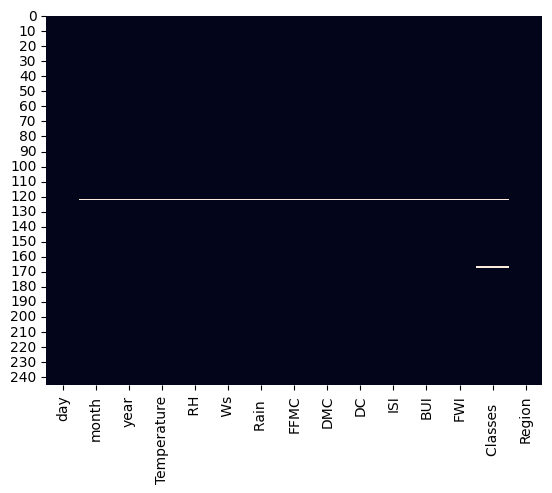

In [108]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(),cbar=False)

***What did you know about your dataset?***

The dataset encompasses data from two distinct regions of Algeria, Bejaia in the northeast and Sidi Bel-abbes in the northwest, with an equal representation of 122 instances from each locale, yielding a combined total of 244 instances. Collected between June 2012 and September 2012, each instance comprises 11 attributes conveying diverse environmental and meteorological conditions. Complementing these attributes, a singular output attribute, labeled "class," assigns a category to each instance, with two available classes: "fire" designating instances with fire occurrences and "not fire" indicating instances without fires. The dataset comprises 138 instances classified as "fire" and 106 instances classified as "not fire," serving as a foundation for comprehending and forecasting fire incidents based on the provided attributes within the specified regions and timeframe.

### What did you know about your dataset?
The AirBnb dataset, which we used for our exploratory data analysis and The dataset contains information on over 49,000 listings in New York City for the year 2019. The dataset includes information such as the name of the listing, the host's name, the neighborhood, the room type, the price, the number of reviews, and more.

This dataset is a valuable resource for analyzing the behavior of guests and hosts on the AirBnb platform and has been used in numerous studies and analyses. By using this dataset, we were able to gain insights into the world of AirBnb and the behavior of its users, informing our analysis and providing valuable insights into the hospitality industry.

###  Checking Missing values

In [109]:
# Checking missing values in the dataset
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [110]:
# Removing the missing/Null values
df = df.dropna().reset_index(drop=True)

In [111]:

# Checking missing value after droping missing/Null values from the datatset
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

## ***2. Understanding Your Variables***

In [112]:
# Dataset columns
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

#### Description of variables of the dataframe

In [113]:
# Shoing statistical information for "Region" columns only because as of there there is only one numerical column avaliable in the dataset
df.describe()

,Region
count,244.000000
mean,0.500000
std,0.501028
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


### Variables Description

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

### Check Unique Values for each variable.

In [114]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in day is 32
No. of unique values in month is 5
No. of unique values in year is 2
No. of unique values in Temperature is 20
No. of unique values in  RH is 63
No. of unique values in  Ws is 19
No. of unique values in Rain  is 40
No. of unique values in FFMC is 174
No. of unique values in DMC is 166
No. of unique values in DC is 198
No. of unique values in ISI is 107
No. of unique values in BUI is 174
No. of unique values in FWI is 127
No. of unique values in Classes   is 9
No. of unique values in Region is 2


### Droping unwanted row

In [115]:
# As per below code there is an unwanted row avalible in the datatset that contain same values as columns names
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


As per below code there is an unwanted row avalible at row number 123 in the datatset that contain same values as columns names, therefore removing the row from the Dataset

In [116]:
# Dropping the row no. 122 from the Dataset
df = df.drop(122).reset_index(drop=True)

In [117]:
# Checking the row no. 122 again after removing the wrong values
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


### Removing the unwanted spaces from column names


In [118]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [119]:
# Creating a copy for EDA
df_copy = df.copy()

##  Exploratory Data Analysis (EDA)

In [120]:
# Need to do eda befor FE

# ***Feature Engineering***


In [121]:
# Dropping'Day','month','year' from the data, as its not required for machine learning
df.drop(['day','month','year'], axis=1,inplace=True)

In [122]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    object 
 1   RH           243 non-null    object 
 2   Ws           243 non-null    object 
 3   Rain         243 non-null    object 
 4   FFMC         243 non-null    object 
 5   DMC          243 non-null    object 
 6   DC           243 non-null    object 
 7   ISI          243 non-null    object 
 8   BUI          243 non-null    object 
 9   FWI          243 non-null    object 
 10  Classes      243 non-null    object 
 11  Region       243 non-null    float64
dtypes: float64(1), object(11)
memory usage: 22.9+ KB


In [123]:
# Converting Region column data type from float to integer.
df['Region'] =  df['Region'].astype(int)
df['Region']

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    1
240    1
241    1
242    1
Name: Region, Length: 243, dtype: int64

In [124]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [125]:
# converting 'day', 'month', 'year', 'Temperature', 'RH', 'Ws' columns from object to integer type
df[['Temperature', 'RH', 'Ws']] = df[['Temperature', 'RH', 'Ws']].astype(int)

In [126]:
# Differentiate  Categorical and Numerical features from the dataset
Categorical_feature = [ i for i in df.columns if df[i].dtype == 'O']
Numerical_feature = [ i for i in df.columns if df[i].dtype != 'O']
print("Categorical features:",Categorical_feature)
print("Numerical features:",Numerical_feature)

Categorical features: ['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']
Numerical features: ['Temperature', 'RH', 'Ws', 'Region']


In [127]:
# Converting remaning columns from object type to float type
for i in Categorical_feature:
  if i != 'Classes':
    df[i] = df[i].astype(float)

In [128]:
# Converting remaining columns from float to integer type
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(int)

In [129]:
# converting those values in integer format
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df['Classes']

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

In [130]:
# Now the dataset is ready for traning the Machine learning module
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temperature  243 non-null    int64
 1   RH           243 non-null    int64
 2   Ws           243 non-null    int64
 3   Rain         243 non-null    int64
 4   FFMC         243 non-null    int64
 5   DMC          243 non-null    int64
 6   DC           243 non-null    int64
 7   ISI          243 non-null    int64
 8   BUI          243 non-null    int64
 9   FWI          243 non-null    int64
 10  Classes      243 non-null    int64
 11  Region       243 non-null    int64
dtypes: int64(12)
memory usage: 22.9 KB


In [131]:
df.to_csv('Algerian_forest_fires_cleaned_dataset_UPDATE.csv')

In [132]:
# Creating x and y variable for machine learning
x = df.drop('FWI',axis=1)
y = df['FWI']
# X = np.log10(df.drop(['Close'], axis=1)).values # Independent Features
# y = np.log10(df['Close']).values # Dependent Features

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(182, 11) (182,) (61, 11) (61,)


## Feature Selection

In [135]:
# Feature selection based on corr
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.306038,0.695331,0.498175,0.390635,0.627053,0.472358,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.229973,-0.652678,-0.415250,-0.235899,-0.714926,-0.360375,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.254496,-0.188049,0.001659,0.096734,-0.025003,0.035080,-0.082570,-0.199969
Rain,-0.306038,0.229973,0.254496,1.000000,-0.499566,-0.254179,-0.275160,-0.299710,-0.268655,-0.319140,-0.044948
FFMC,0.695331,-0.652678,-0.188049,-0.499566,1.000000,0.620763,0.524165,0.742492,0.608335,0.780763,0.250205
DMC,0.498175,-0.415250,0.001659,-0.254179,0.620763,1.000000,0.868316,0.685493,0.983034,0.616216,0.210496
DC,0.390635,-0.235899,0.096734,-0.275160,0.524165,0.868316,1.000000,0.507149,0.941932,0.543436,-0.060266
ISI,0.627053,-0.714926,-0.025003,-0.299710,0.742492,0.685493,0.507149,1.000000,0.640555,0.738239,0.301688
BUI,0.472358,-0.360375,0.035080,-0.268655,0.608335,0.983034,0.941932,0.640555,1.000000,0.613871,0.115529
Classes,0.542141,-0.456876,-0.082570,-0.319140,0.780763,0.616216,0.543436,0.738239,0.613871,1.000000,0.188837


<Axes: >

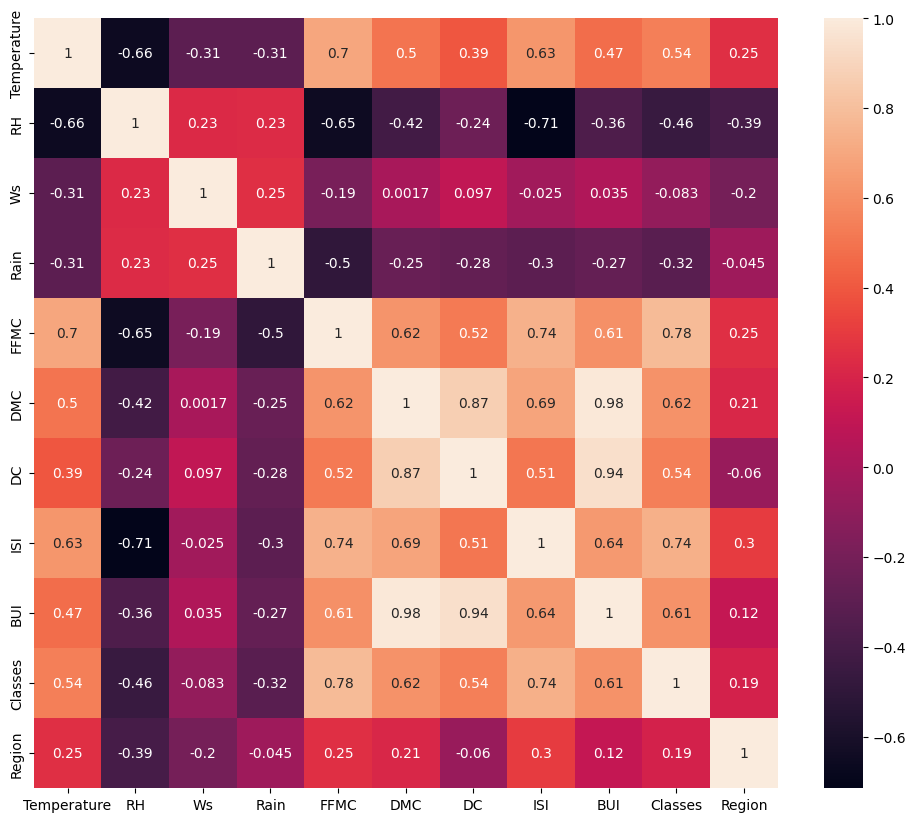

In [136]:
# Feature Selection Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In the below given function, we are identifying columns within the dataset that surpass a specified threshold amount, and subsequently excluding those columns from the dataset. Thid process is known as Feature selection.

In [137]:
# Creating a function correlation for extracting a columns that contain greater value that the threshold amount
def correlation(dataset, threshold):
  corr_col = set()
  corr_metrix = dataset.corr()
  for i in range(len(corr_metrix.columns)):
    for j in range(i):
      if abs(corr_metrix.iloc[i,j])>threshold:
        colname = corr_metrix.columns[i]
        corr_col.add(colname)
  return corr_col

In [138]:
# Applying the'correlation' function, threshold--Domain expertise
corr_features=correlation(X_train,0.85)
print(corr_features)

{'DC', 'BUI'}


In [139]:
# drop features when correlation is more than 0.85
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)
print(X_train.shape, X_test.shape)

(182, 9) (61, 9)


## Feature Scaling Or Standardization

In [140]:
from sklearn.preprocessing import StandardScaler
encoder = StandardScaler()
X_train_scaled = encoder.fit_transform(X_train)
X_test_scaled = encoder.transform(X_test)

In [141]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.5579568 ,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -1.02164693,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.6878741 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.02164693,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.60126852,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.78980187,
        -1.10431526, -0.98907071]])

In [142]:
X_test_scaled

array([[-0.30175842,  0.11522353, -0.21905398, -0.32331979,  0.61223879,
        -0.01959019,  0.13757839,  0.90553851, -0.98907071],
       [ 0.23932564, -0.55263261, -0.9784411 , -0.32331979,  0.75161022,
        -0.41574739,  0.36942345,  0.90553851, -0.98907071],
       [-1.11338451, -0.28549015,  0.9200267 ,  0.65741691, -0.99053268,
        -0.89113604, -0.78980187, -1.10431526,  1.01105006],
       [ 0.50986767, -0.28549015, -0.9784411 , -0.32331979,  0.12443878,
         0.29733557, -0.5579568 , -1.10431526,  1.01105006],
       [-0.57230045,  0.18200914, -0.59874754, -0.32331979,  0.54255307,
         0.13887269, -0.09426667,  0.90553851,  1.01105006],
       [ 1.86257782,  0.11522353, -2.49721534,  0.16704856, -0.29367552,
        -0.25728451, -0.78980187, -1.10431526,  1.01105006],
       [-1.11338451,  0.84986528,  0.16063958, -0.32331979,  0.33349593,
        -0.8119046 , -0.32611174,  0.90553851,  1.01105006],
       [ 1.32149376, -1.75477365, -0.9784411 , -0.32331979,  0

### Ploting a Box Plot to understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train_after_scaled')

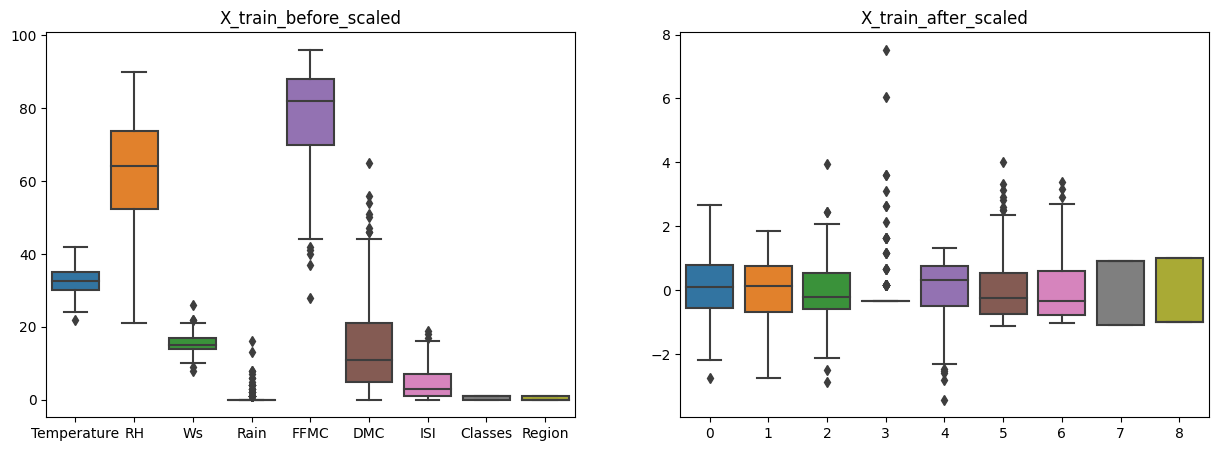

In [143]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(data=X_train)
plt.title('X_train_before_scaled')
plt.subplot(122)
sns.boxplot(data=X_train_scaled)
plt.title('X_train_after_scaled')

From the above box plot ('X_train_before_scaled','X_train_after_scaled') we can observe that before standardization the box plot for all the columns in the datatset are unorganised but after performing standardscaler all the data get organised in one row.

# ***Machine Learning (ML)***

## Linear Regression Model

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linear = LinearRegression ()
linear.fit(X_train_scaled,y_train)

# Predict using the test_scaled_dataset
y_pred = linear.predict(X_test_scaled)


In [145]:
# Calculating the performance metrics.
MAE_linear = round(mean_absolute_error(y_test,y_pred),4)
print(f"Mean Absolute Error : {MAE_linear}")

MSE_linear = round(mean_squared_error(y_test,y_pred),4)
print(f"Mean squared Error : {MSE_linear}")

RMSE_linear = round(np.sqrt(MSE_linear),4)
print(f"Root Mean squared Error : {RMSE_linear}")

R2_linear = round(r2_score(y_test, y_pred),4)
print(f"R2 score : {R2_linear}")

Adjusted_R2_linear = round(1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print(f"Adjusted R2 score : {Adjusted_R2_linear}")

Mean Absolute Error : 0.6513
Mean squared Error : 0.8527
Root Mean squared Error : 0.9234
R2 score : 0.9806
Adjusted R2 score : 0.977


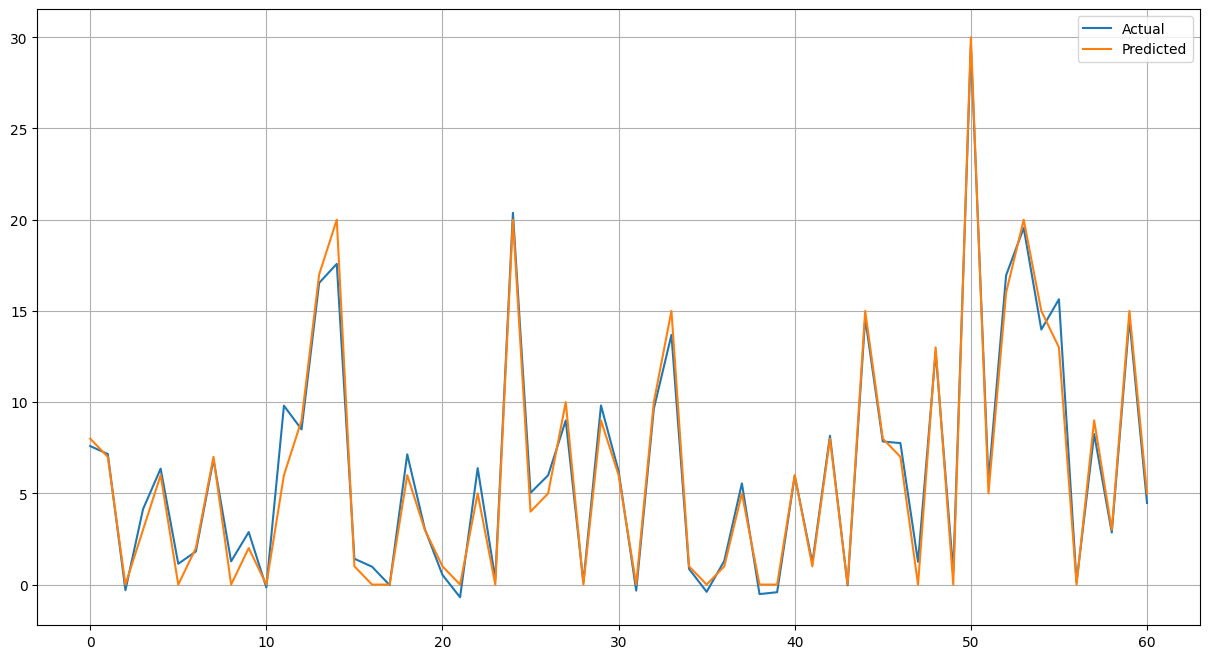

In [146]:
# Linear Regression Plotting between Actual and Predicted values
plt.figure(figsize=(15,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

In [147]:
# checking accuracy of the model
linear.score(X_train, y_train)

-40.27896850826471

In [148]:
# checking the intercept i.e checking the model parameters
linear.intercept_

6.736263736263737

In [149]:
# checking the coefficient of LinearRegression model
linear.coef_

array([-0.02501021, -0.17593166,  0.04952252, -0.00888951, -0.88398806,
        3.74362819,  4.75277642,  0.50655786, -0.38347969])

In [150]:
evaluation_metrics_list_linear = { 'Mean squared Error' : MSE_linear,
                                    'Root Mean squared Error' : RMSE_linear,
                                  'Mean Absolute Error' : MAE_linear,
                                  'R2 score' : R2_linear,
                                  'Adjusted R2 score' : Adjusted_R2_linear
                                 }

metric_df = pd.DataFrame.from_dict(evaluation_metrics_list_linear, orient='index').reset_index()
metric_df = metric_df.rename(columns={'index':'Metric',0:'Linear Regression'})
metric_df

,Metric,Linear Regression
0,Mean squared Error,0.8527
1,Root Mean squared Error,0.9234
2,Mean Absolute Error,0.6513
3,R2 score,0.9806
4,Adjusted R2 score,0.9770


## Lasso Regression

In [151]:
# Import the necessary library
from sklearn.linear_model import Lasso

# Create a Lasso regression model instance with specified parameters
# alpha: Regularization strength (L1 penalty)
# max_iter: Maximum number of iterations for optimization
lasso = Lasso(alpha=0.001, max_iter=3000)

# Fit the Lasso regression model using training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [152]:
# checking the acuuracy for lasso model
lasso.score(X_train, y_train)

0.9653900791248484

In [153]:
# checking the intercept i.e checking the model parameters
lasso.intercept_

2.8472018674743373

In [154]:
# checking the coefficient of Lasso model
lasso.coef_

array([-0.00662448, -0.01152768,  0.018671  , -0.0037049 , -0.06122933,
        0.29661911,  1.10252266,  1.00405362, -0.76233057])

#### 2. Cross- Validation & Hyperparameter Tuning

In [155]:
# Cross Validation. Optimizing our model by finding the best value of our hyperparamter
from sklearn.model_selection import GridSearchCV

lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_model = GridSearchCV(lasso_cv,parameters,scoring = 'neg_mean_squared_error',cv = 3)
lasso_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [156]:
print("The best fit alpha value is found out to be :" ,lasso_model.best_params_)
print("\nUsing ",lasso_model.best_params_, " the negative mean squared error is: ", lasso_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-13}

Using  {'alpha': 1e-13}  the negative mean squared error is:  -3.144465002085673


In [157]:
# Predicting on the test dataset
y_pred_lasso = lasso_model.predict(X_test)

In [158]:
# checking the performance using evaluation metrics.
MAE_lasso = round(mean_absolute_error(y_test,y_pred_lasso),4)
print(f"Mean Absolute Error : {MAE_lasso}")

MSE_lasso  = round(mean_squared_error(y_test,y_pred_lasso),4)
print("Mean squared Error :" , MSE_lasso)

RMSE_lasso = round(np.sqrt(MSE_lasso),4)
print("Root Mean squared Error :" ,RMSE_lasso)

R2_lasso = round(r2_score(y_test, y_pred_lasso),4)
print("R2 score :" ,R2_lasso)

Adjusted_R2_lasso = round(1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_lasso)

Mean Absolute Error : 0.6513
Mean squared Error : 0.8527
Root Mean squared Error : 0.9234
R2 score : 0.9806
Adjusted R2 score:  0.9772


In [159]:
metric_df['Lasso'] = [MSE_lasso,RMSE_lasso,MAE_lasso,R2_lasso, Adjusted_R2_lasso]
metric_df

,Metric,Linear Regression,Lasso
0,Mean squared Error,0.8527,0.8527
1,Root Mean squared Error,0.9234,0.9234
2,Mean Absolute Error,0.6513,0.6513
3,R2 score,0.9806,0.9806
4,Adjusted R2 score,0.9770,0.9772


#### Lasso Predication vs Actual (After Validification)

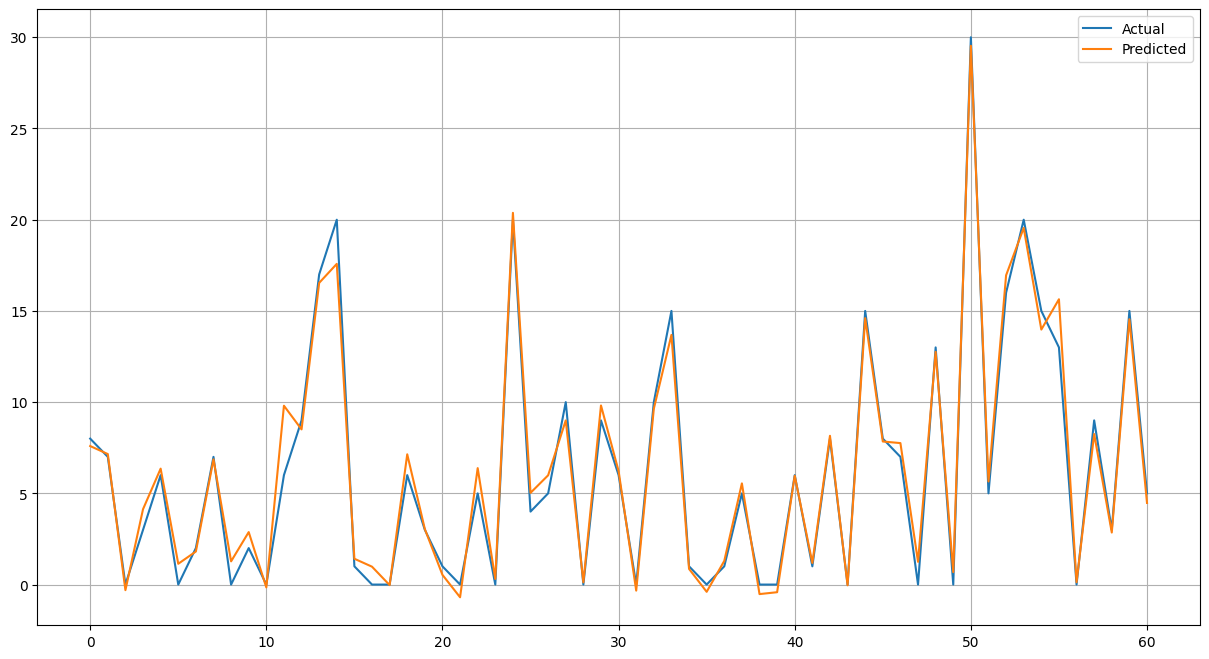

In [160]:
# Plotting between Actual and Predicted values
plt.figure(figsize=(15,8))
plt.plot(np.array(y_test))
plt.plot(y_pred_lasso)
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

## Ridge Regression model

In [161]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


ridge=Ridge(alpha=0.1)
ridge.fit(X_train_scaled,y_train)  # fitting the X_train_scaled and y_train in fit fuction from Ridge


Ridge(alpha=0.1)

In [162]:
# checking the acuuracy for Ridge model
ridge.score(X_train, y_train)

-40.26733518736252

In [163]:
# Predicting our test data
y_ridge_pred = ridge.predict(X_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [164]:
# Cross Validation. Optimizing our model by finding the best value of our hyperparamter
ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model = GridSearchCV(ridge_cv,parameters,scoring='neg_mean_squared_error',cv=3)
ridge_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [165]:
print("The best fit alpha value is found out to be :" ,ridge_model.best_params_)
print("\nUsing ",ridge_model.best_params_, " the negative mean squared error is: ", ridge_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -3.1289470574926397


In [166]:
# Model Predication
y_pred_ridge  = ridge_model.predict(X_test)

In [167]:
# Calculating the performance metrics.
MAE_ridge = round(mean_absolute_error(y_test,y_pred),4)
print("mean absolute error: ",MAE_ridge)

MSE_ridge = round(mean_squared_error(y_test,y_pred),4)
print("mean squared error: ",MSE_ridge)

RMSE_ridge = round(np.sqrt(MSE_ridge),4)
print("root mean squared error: ",RMSE_ridge)

R2_ridge = round(r2_score(y_test,y_pred))
print('R2 scoor: ',R2_ridge)

Adjusted_R2_ridge = round(1 - (1 - r2_score(y_test, y_pred_ridge)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)), 4)
print("Adjusted R2 score:", Adjusted_R2_ridge)


mean absolute error:  0.6513
mean squared error:  0.8527
root mean squared error:  0.9234
R2 scoor:  1
Adjusted R2 score: 0.9762


In [168]:
metric_df['Ridge'] = [MSE_ridge,RMSE_ridge,MAE_ridge,R2_ridge, Adjusted_R2_ridge]
metric_df

,Metric,Linear Regression,Lasso,Ridge
0,Mean squared Error,0.8527,0.8527,0.8527
1,Root Mean squared Error,0.9234,0.9234,0.9234
2,Mean Absolute Error,0.6513,0.6513,0.6513
3,R2 score,0.9806,0.9806,1.0000
4,Adjusted R2 score,0.9770,0.9772,0.9762


#### Ridge Predication vs Actual (After Validification)

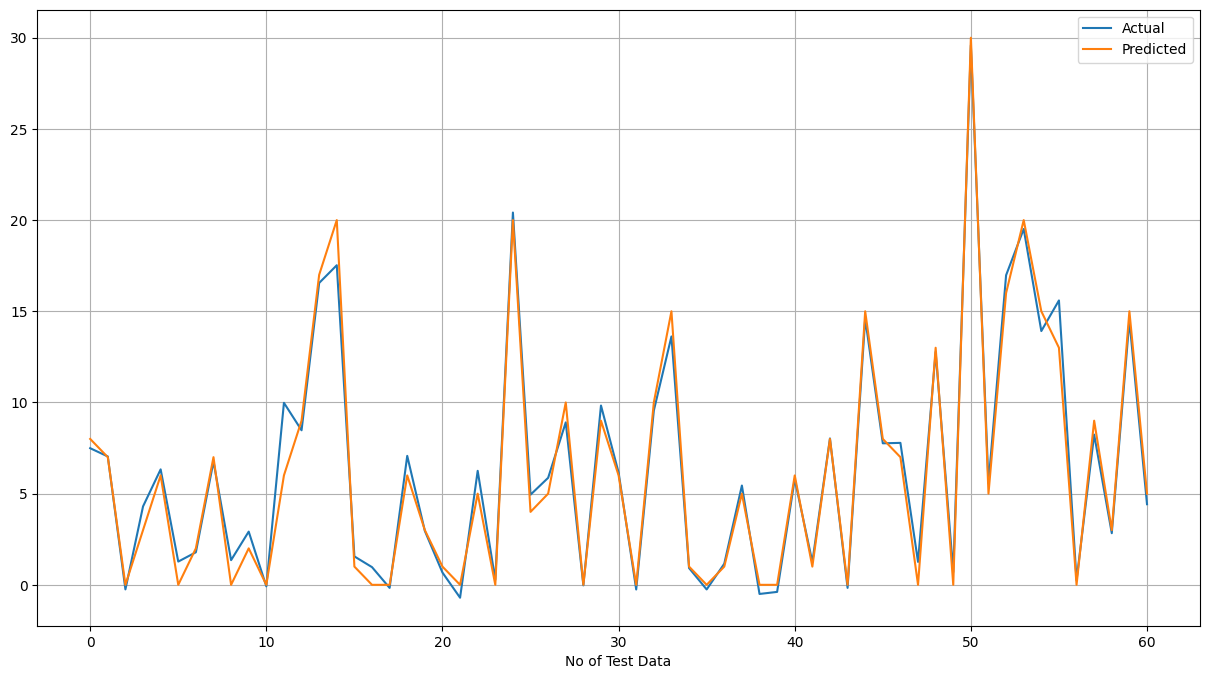

In [169]:
# Plotting between Actual and Predicted values
plt.figure(figsize=(15,8))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

## Elastic Net Linear Regression

In [170]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

elasticnet = ElasticNet(alpha=0.1)
elasticnet.fit(X_train,y_train) # fitting the X_train_scaled and y_train in fit fuction from ElasticNet

ElasticNet(alpha=0.1)

In [171]:
# checking the acuuracy for Ridge model
elasticnet.score(X_train, y_train)

0.9641661925053138

In [172]:
# checking the intercept i.e checking the model parameters
elasticnet.intercept_

0.5957719250439233

In [173]:
# Checking the coiffient of Elasticnet model
elasticnet.coef_

array([-0.00000000e+00, -7.14552144e-04,  2.09334512e-02,  0.00000000e+00,
       -4.22586378e-02,  2.98060183e-01,  1.12494502e+00,  2.29509268e-01,
       -4.20492660e-01])

In [174]:
# Predicting our test data
y_elasticnet_pred = elasticnet.predict(X_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [175]:
# Cross Validation. Optimizing our model by finding the best value of our hyperparamter
elasticnet_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
elasticnet_model = GridSearchCV(elasticnet_cv,parameters,scoring = 'neg_mean_squared_error', cv = 3)
elasticnet_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [176]:
print("The best fit alpha value is found out to be :" ,elasticnet_model.best_params_)
print("\nUsing ",elasticnet_model.best_params_, " the negative mean squared error is: ", elasticnet_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -3.1413175950346734


In [177]:
# Model Predication
y_pred_elasticnet = elasticnet_model.predict(X_test)

In [178]:
# Calculating the performance metrics.
MAE_elasticnet = round(mean_absolute_error(y_test,y_pred),4)
print("mean absolute error: ",MAE_elasticnet)

MSE_elasticnet = round(mean_squared_error(y_test,y_pred),4)
print("mean squared error: ",MSE_elasticnet)

RMSE_elasticnet = round(np.sqrt(MSE_ridge),4)
print("root mean squared error: ",RMSE_elasticnet)

R2_elasticnet = round(r2_score(y_test,y_pred))
print('R2 scoor: ',R2_elasticnet)

Adjusted_R2_elasticnet = round(1 - (1 - r2_score(y_test, y_pred_ridge)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)), 4)
print("Adjusted R2 score:", Adjusted_R2_elasticnet)


mean absolute error:  0.6513
mean squared error:  0.8527
root mean squared error:  0.9234
R2 scoor:  1
Adjusted R2 score: 0.9762


In [179]:
metric_df['ElasticNet'] = [MSE_elasticnet,RMSE_elasticnet,MAE_elasticnet,R2_elasticnet, Adjusted_R2_elasticnet]
metric_df

,Metric,Linear Regression,Lasso,Ridge,ElasticNet
0,Mean squared Error,0.8527,0.8527,0.8527,0.8527
1,Root Mean squared Error,0.9234,0.9234,0.9234,0.9234
2,Mean Absolute Error,0.6513,0.6513,0.6513,0.6513
3,R2 score,0.9806,0.9806,1.0000,1.0000
4,Adjusted R2 score,0.9770,0.9772,0.9762,0.9762


#### ElasticNEt Predication vs Actual (After Validification)

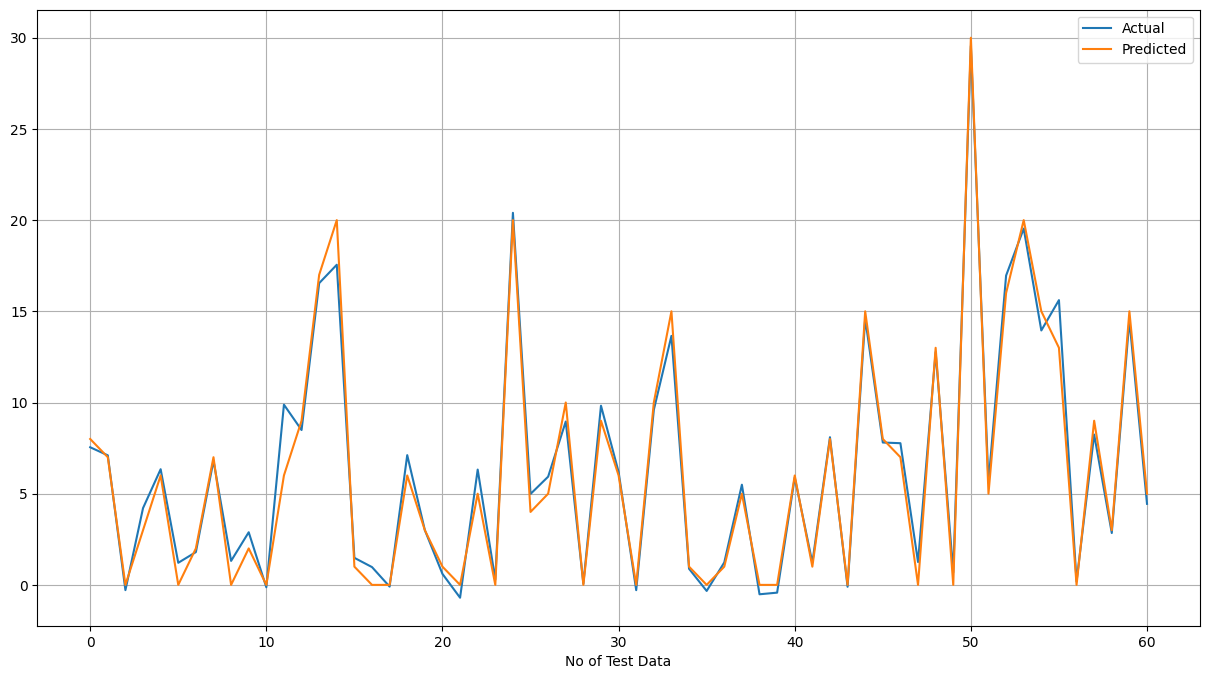

In [180]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_elasticnet)
plt.plot(np.array(y_test))
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

As we can see from above graphs, all models are performing really well and are able to predict the close prices which nearly to the actual values.

# **Conclusion**

In [181]:
metric_df

,Metric,Linear Regression,Lasso,Ridge,ElasticNet
0,Mean squared Error,0.8527,0.8527,0.8527,0.8527
1,Root Mean squared Error,0.9234,0.9234,0.9234,0.9234
2,Mean Absolute Error,0.6513,0.6513,0.6513,0.6513
3,R2 score,0.9806,0.9806,1.0000,1.0000
4,Adjusted R2 score,0.9770,0.9772,0.9762,0.9762
